In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/uniref90/../..']

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
virprobert_embedding_file_path = os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/uniref90_embl_vertebrates_idv_all_hosts/20241125/host_multi/embedding/mlm_tfenc_l6_h8_lr1e-4_uniref90viridae_vs30_hybd_attn_msl256s64ae_bn_cls_fnn_2l_d1024_lr1e-4_output.csv")

In [6]:
virprobert_embedding_df = pd.read_csv(virprobert_embedding_file_path, index_col=0)
virprobert_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,uniref90_id,y_true
0,2.335960,1.930422,2.800628,-1.295091,-1.544967,-5.816815,-2.856904,-0.031282,1.029839,-1.704246,...,2.553344,-0.200530,-4.673324,2.790027,-3.699858,0.634019,-1.105638,-0.710477,['UniRef90_F6KIK6'],Human
1,1.956856,1.067640,1.661196,-1.108338,-1.580109,-5.408813,-2.182711,-0.508974,0.475396,-1.193956,...,2.668538,-0.360990,-3.924355,2.545581,-2.962814,0.937847,-1.333633,-0.659193,['UniRef90_A0A8K1XHJ5'],Human
2,2.140652,1.598617,2.926840,-1.694828,-1.494031,-6.367061,-2.661662,-0.257244,0.953449,-1.291721,...,2.800972,-0.537052,-4.223130,2.660893,-3.818322,0.500921,-1.381829,-0.640200,['UniRef90_A0A6B7HMR4'],Human
3,2.216493,1.614753,2.907310,-1.298657,-1.709379,-6.002470,-2.154972,-0.274561,1.101802,-1.637290,...,2.591560,0.109085,-4.162312,2.424145,-3.290051,0.726345,-1.615398,-0.668338,['UniRef90_F1DT56'],Human
4,2.460719,1.899697,2.850236,-1.569758,-1.493915,-6.292736,-2.600443,0.043113,0.865691,-1.648971,...,2.682242,-0.268165,-4.563413,2.292521,-3.407532,0.615855,-1.549489,-0.793689,['UniRef90_A0A1C9ICR4'],Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,2.428128,1.726163,2.708883,-1.528704,-1.677463,-6.591654,-2.797620,-0.152527,0.716244,-1.850860,...,3.015248,-0.250374,-4.967479,2.662828,-3.646894,0.813375,-1.686621,-0.887841,['UniRef90_A0A0A1G2D0'],Human
3165,2.422202,1.859351,2.292324,-1.476851,-1.624907,-5.917471,-2.625886,-0.284668,0.958400,-1.734710,...,2.658899,-0.060222,-4.651911,2.512104,-3.334750,0.764117,-1.395661,-0.834862,['UniRef90_A0A1C8FBQ9'],Human
3166,2.043030,1.523983,2.406593,-1.701357,-1.278985,-5.881051,-2.556493,-0.207674,0.821842,-1.371646,...,2.635543,-0.399699,-4.137483,2.481307,-3.613606,0.570359,-1.112819,-0.599125,['UniRef90_A0A068F743'],Human
3167,2.307539,1.699663,2.767181,-1.367015,-1.693287,-5.969986,-2.459104,-0.255205,0.968886,-1.587013,...,2.605138,-0.102612,-4.506471,2.458191,-3.467267,0.763775,-1.488581,-0.756045,['UniRef90_A0A2N9QR21'],Human


In [7]:
label_col = "y_true"
columns = list(virprobert_embedding_df.columns)
columns.remove("uniref90_id")
columns.remove(label_col)

In [8]:
import umap

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
umap_emb = umap.UMAP(random_state=42).fit_transform(virprobert_embedding_df[columns])

/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [11]:
umap_emb_df = pd.DataFrame(umap_emb, columns=["umap1", "umap2"])
umap_emb_df[label_col] = virprobert_embedding_df[label_col]
umap_emb_df

,umap1,umap2,y_true
0,2.599859,5.963132,Human
1,0.898969,-0.906520,Human
2,2.662074,-2.639576,Human
3,4.404233,-1.417960,Human
4,4.486544,-1.276571,Human
...,...,...,...
3164,4.390131,-0.631843,Human
3165,3.345702,-0.145585,Human
3166,1.471310,-3.399005,Human
3167,4.241595,-0.968502,Human


<Figure size 640x480 with 0 Axes>

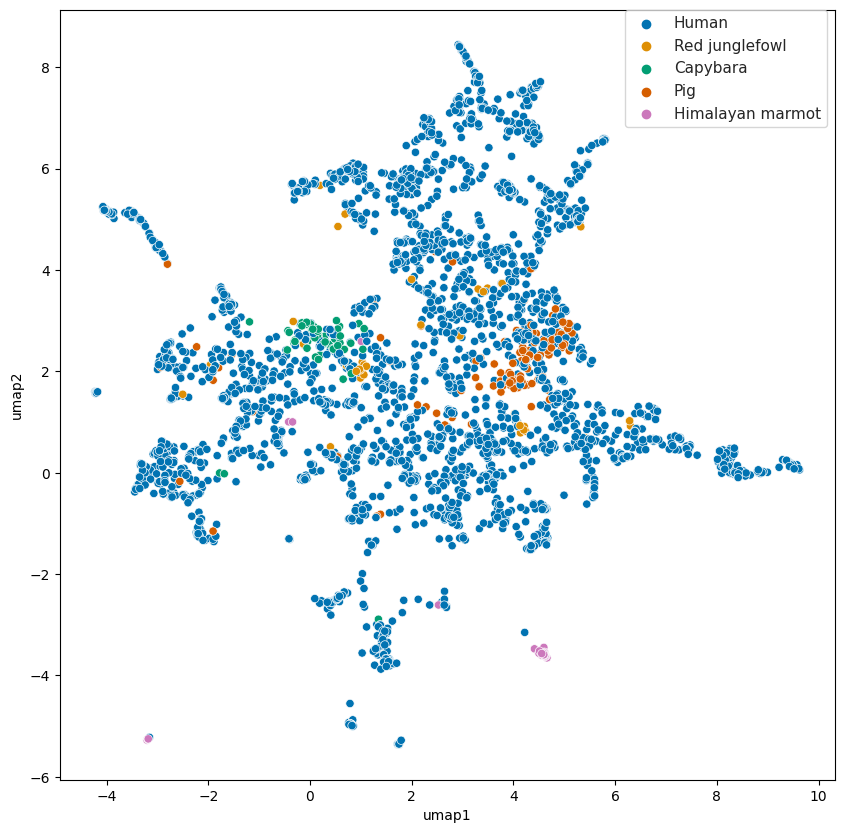

In [12]:
plt.clf()
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style="whitegrid")
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 20})

sns.scatterplot(data=umap_emb_df, x="umap1", y="umap2", hue=label_col, ax=axs, palette="colorblind")
axs.legend(bbox_to_anchor=(1.00, 1.01))